In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# **Repressilator Background and Introduction**
**How does this apply to biological systems and what techniques from BIOL301 are we using?**

The repressilator is a synthetic genetic simulation, usually containing three or more genes that inhibit each other in a cyclical pattern. It creates periodic behavior similar to natural biological oscillators that can be graphed and analyzed. This system shows how engineering principles can be applied to design predictable and tunable biological systems. The project focuses on exploring how changing parameters like cooperativity (n) and production rates (α) influence the dynamics of the repressilator, specifically whether it reaches a steady state or produces oscillations.  

The repressilator is valuable to explore as it highlights how specific parameters impact the transition between stability and oscillation in feedback loops. This knowledge is crucial for applications in disease modeling, such as cancer, where dysregulated feedback occurs, and in synthetic biology, where oscillatory circuits can be used for biosensors or time-controlled drug delivery systems. Exploring these dynamics can lead to improved designs of genetic circuits with tailored behaviors for therapeutic or industrial applications.

For the majority of our project, we are exploring the sensitivity of the parameters to study how variations in production rate and the hill coefficient influence the system’s behavior. This will allow us to visualize the repressilators tunability and predictability of other real-world applications in which a repressilator can be used. The biological system we selected to show this simulation in a real-world application is the circadian rhythm in cyanobacteria, which is driven by the oscillatory interactions of the proteins KaiA, KaiB, and KaiC. This circadian clock regulates processes like photosynthesis and gene expression. It is a valuable way to visualize and analyze fundamental biology concepts such as understanding feedback loops and how they generate rhythmic behavior in living systems. It can also help design oscillatory systems for controlling biological processes like drug delivery or metabolic engineering. It’s also important because circadian disruptions are linked to sleep disorders, metabolic syndromes, and cancer.

Techniques we are using are ordinary differential equations (ODEs) to model the interactions between KaiA, KaiB, and KaiC. ODEs are good for this problem because they allow us to represent the rate of change in protein concentrations over time. These equations can be solved through numerical integration and visualizing the gene expression dynamics over time using Python.

[To read more background and information over repressilator systems with biological applications and other modeling methods, click on the link here!](https://pubs.rsc.org/en/content/articlepdf/2015/mb/c5mb00012b)

# **How does a low cooperativity (𝑛) and production rate (𝛼) value affect the repressilator's dynamics, specifically in terms of reaching a steady state versus producing oscillations?**

In [15]:
# Define repressilator equations with four terms
def repressilator(y, t, alpha, n):
    x1, x2, x3, x4 = y
    dx1_dt = alpha / (1 + x4**n) - x1
    dx2_dt = alpha / (1 + x1**n) - x2
    dx3_dt = alpha / (1 + x2**n) - x3
    dx4_dt = alpha / (1 + x3**n) - x4
    return [dx1_dt, dx2_dt, dx3_dt, dx4_dt]

Text(0.5, 1.0, '4-Gene Repressilator Dynamics')

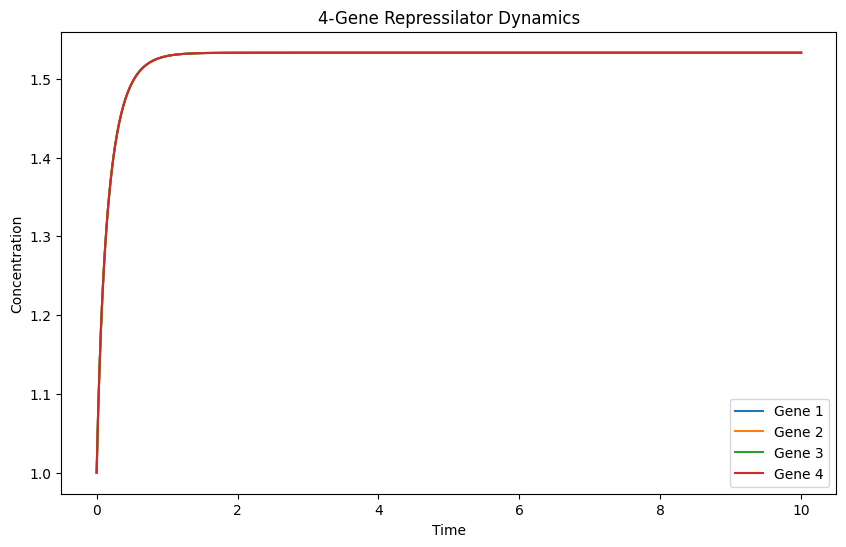

In [16]:
# Parameters
alpha = 10
n = 4
t = np.linspace(0, 10, 1000)  # Time points

# Initial conditions
y0 = [1, 1, 1, 1]

# Solve ODEs
solution = odeint(repressilator, y0, t, args=(alpha, n))
x1, x2, x3, x4 = solution.T

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, x1, label="Gene 1")
plt.plot(t, x2, label="Gene 2")
plt.plot(t, x3, label="Gene 3")
plt.plot(t, x4, label="Gene 4")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("4-Gene Repressilator Dynamics")

This code models a 4-gene repressilator system, where each gene cyclically represses the production of the next. The dynamics are defined by the function `repressilator`, which calculates the rate of change for each gene’s concentration. Each gene’s production is repressed by the concentration of the previous gene in the cycle, as seen in the term $ \alpha / (1 + x_{\text{prev}}^n) $, where $ \alpha $ is the maximum production rate and $ n $ is the cooperativity or Hill Coefficient, which determines how sharply each gene represses the next.
The code has $ \alpha = 5$ and $n = 4$, which creates a system where the repressilator cycle achieves equilibrium rather than oscillations. With high cooperativity, each gene’s repression effect is strong and creates a scenario where all genes are balanced. However, all of the genes are on top of each other, producing only 1 line with the 4 genes following along. The gene concentrations stabilize at around 1.3. This stabilized value happens at this value because the system reaches a point where each gene’s production rate is balanced by its degradation rate, which results in a steady-state equilibrium and why they follow along the same line (along with the fact that they have the same intial conditions). The equilibrium concentration of 1.3 is the level at which the influence of the repressive chain keeps each gene at similar concentrations to balance production and degradation effects.

## **How does changing the initial conditions, having a larger value of the Hill Coefficient cooperativity parameter (𝑛), and keeping ($\alpha$) the same value of 10 impact the sharpness and persistence of oscillations, and what might this imply about the biological significance of sharp, switch-like behavior in gene regulatory systems?**

Text(0.5, 1.0, '4-Gene Repressilator Dynamics')

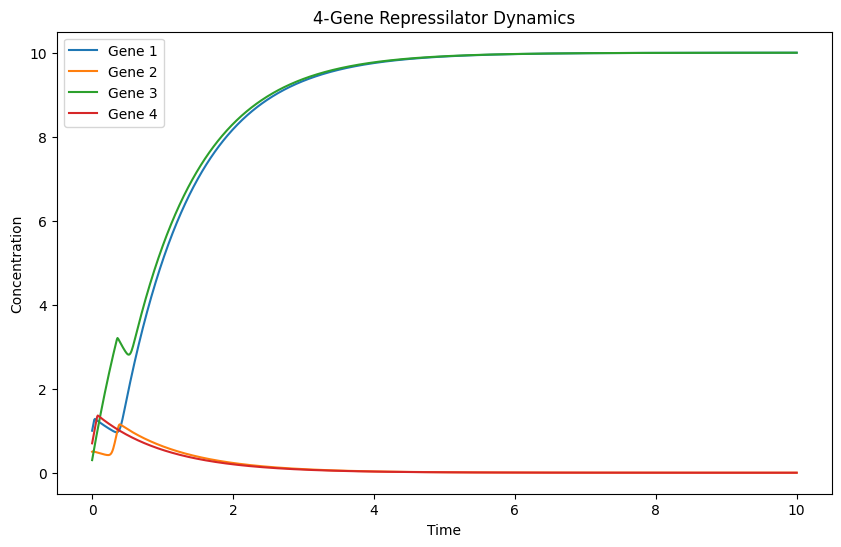

In [ ]:
# Parameters - different initial conditions
alpha = 10
n = 50       # Higher cooperativity

# New initial conditions for slight asymmetry
y0 = [1.0, 0.5, 0.3, 0.7]

# Solve ODEs
solution = odeint(repressilator, y0, t, args=(alpha, n))
x1, x2, x3, x4 = solution.T

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, x1, label="Gene 1")
plt.plot(t, x2, label="Gene 2")
plt.plot(t, x3, label="Gene 3")
plt.plot(t, x4, label="Gene 4")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("4-Gene Repressilator Dynamics")

Changing initial conditions changes where each gene starts and how they activate/repress each other.

a) Higher initial concentrations would cause the system to exhibit stronger or more sustained oscillations because of the increased push each gene experiences. However, the repressilator should eventually settle into an oscillation pattern.

b) Low starting concentrations result in our graph being stabilized quicker as they settle on the fixed points in either the "on" or "off" position.

c) Asymmetry in initial gene concentrations (starting each gene at a different value) impacts the symmetry and phase of the oscillations (or lack thereof with a four gene repressilator). Our code shows thatt each gene's peak does not align with the others. This phase shift also creates a situation where some genes settle at different amplitudes or frequencies, depending on the initial values.

## **How does changing the initial conditions, having a larger value of the Hill Coefficient cooperativity parameter (𝑛) and a larger value of ($\alpha$) impact the sharpness and persistence of oscillations, and what might this imply about the biological significance of sharp, switch-like behavior in gene regulatory systems?**

Text(0.5, 1.0, '4-Gene Repressilator Dynamics')

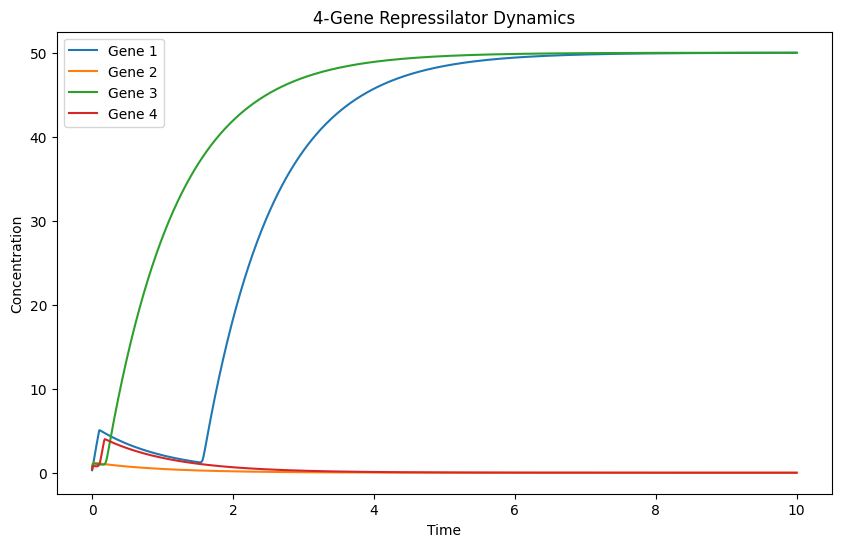

In [ ]:
# Parameters - try with increased alpha and n
alpha = 50  # Increased alpha to promote oscillations
n = 100     # Higher cooperativity

# New initial conditions for slight asymmetry
y0 = [0.3, 0.5, 0.6, 0.4]

# Solve ODEs
solution = odeint(repressilator, y0, t, args=(alpha, n))
x1, x2, x3, x4 = solution.T

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, x1, label="Gene 1")
plt.plot(t, x2, label="Gene 2")
plt.plot(t, x3, label="Gene 3")
plt.plot(t, x4, label="Gene 4")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("4-Gene Repressilator Dynamics")

Increased $ n $: Increasing cooperativity (the parameter $ n $ in your repressilator system) enhances the oscillatory behavior and can create sharper and more distinct fluctuations in the concentrations of each gene.

a) There is a steeper response curve. When $ n $ is higher, the response curve (Hill function) between each gene’s concentration and its repressive effect on the next gene becomes steeper. The system responds more dramatically to changes in gene concentrations, so each gene’s effect on the others is more pronounced. With lower cooperativity, the response is more gradual, and the system may not oscillate as visibly, leading to less distinct fluctuations, especially with a 4 gene repressilator system.

b) Expanding on part a, there is an increased sensitivity to changes. Higher cooperativity (larger $ n $) makes the system more sensitive to differences in concentration. As a result, even small changes in one gene’s concentration can cause large responses in the others and amplify the oscillations more over time.

c) We also observed sharp transitions with the 4 gene repressilator system. With higher cooperativity ($ n $), each gene’s production is more tightly controlled by the presence of the previous gene. This leads to a "switch-like" behavior around time = 0 through time = 3, where each gene concentration rises and falls sharply rather than smoothly transitioning. These sharp transitions make each gene's peak and trough in concentration more visible.

d) Lastly, there seems to be reduced damping. In systems with lower cooperativity, the oscillations may dampen over time and lead to a steady state where all gene concentrations are stabilized. However, higher cooperativity allows oscillations to continue occuring, which is why we see distinct peaks and fluctuations for each gene with a very large $ n $.

# **How does the combination of different asymmetrical initial conditions (comapred to the former question), high cooperativity (𝑛) and high production rate (𝛼) influence the system's ability to settle into stable 'on' and 'off' states for specific genes, and what role do initial conditions play in determining which genes become active or repressed?**

Text(0.5, 1.0, '4-Gene Repressilator Dynamics')

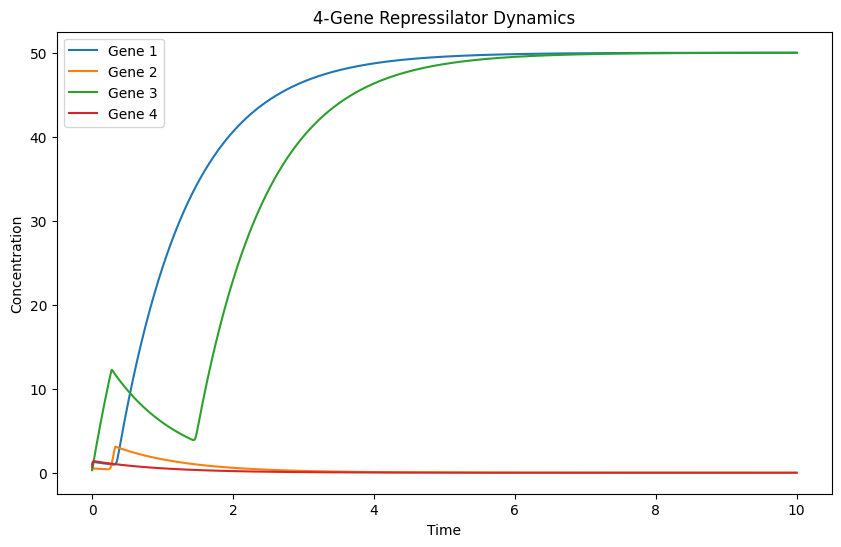

In [ ]:
# Parameters - try with increased alpha and n
alpha = 50  # Increased alpha to promote oscillations
n = 100     # Higher cooperativity

# New initial conditions for slight asymmetry
y0 = [1.0, 0.5, 0.3, 0.7]

# Solve ODEs
solution = odeint(repressilator, y0, t, args=(alpha, n))
x1, x2, x3, x4 = solution.T

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, x1, label="Gene 1")
plt.plot(t, x2, label="Gene 2")
plt.plot(t, x3, label="Gene 3")
plt.plot(t, x4, label="Gene 4")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("4-Gene Repressilator Dynamics")

Increased $ \alpha $ and $ n $: When the $ n $ (cooperativity parameter) is very high, the results seen on the graph behave like an on-off switch based on the state of its repressor. This creates a situation where certain genes remain stuck/fixed in a high or low state, depending on the initial conditions and how the repression chain locks into a specific pattern. We see that with a very large $ n $, Gene 2 and Gene 4 stabilize at 0, while Gene 1 and Gene 3 stabilize at 5.

a) As mentioned above, we see this switch-Like behavior with high cooperativity. With very large $ n $, the repression terms (ex. $ \frac{\alpha}{1 + x_k^n} $) act almost like binary switches. If the repressor gene’s concentration $ x_k $ is non-zero, the repression term approaches zero and "turns off" the production of the next gene. On the other hand, if $ x_k $ is close to zero, the repression term becomes very large and "turns on" the production of the next gene. This "on" and "off" behavior causes unusual oscillations and can lead to a stable state where some genes are continuously repressed (near zero), while others are continuously expressed (near $ \alpha $).

b) Additionally, high cooperativity can "break" the symmetry of the system by pushing it into a state where each gene either "wins" (reaches high expression) or "loses" (stays at low expression). In this case, genes 1 and 3 reach high concentrations because of their initial conditions and the system's equations favor their expression first and represses genes 2 and 4 to near zero. For example, in the $ x1 $ equation, gene 4 is in the denominator, so it is repressed, while gene 1 is produced.

c) The reason the high concentration stabilized point is 50 is because our $ \alpha $ is 50. With very high values of $ \alpha $ and large $ n $, the concentrations of genes that aren’t repressed approach $ \alpha $. So in this stable state, genes 1 and 3 stabilize near $ \alpha = 50 $, while genes 2 and 4, which are repressed, stabilize near zero.

# **How does the number of genes (3, 4, or 5) in a repressilator affect its dynamics, particularly why does an odd number of genes lead to oscillations while an even number tends to settle at a fixed point?**

**The next three code cells visualize a 3, 4, and 5 gene repressilator**

In [13]:
# Define repressilator equations with three terms
def repressilator(y, t, alpha, n):
    x1, x2, x3 = y
    dx1_dt = alpha / (1 + x3**n) - x1
    dx2_dt = alpha / (1 + x1**n) - x2
    dx3_dt = alpha / (1 + x2**n) - x3
    return [dx1_dt, dx2_dt, dx3_dt]

Text(0.5, 1.0, '3-Gene Repressilator Dynamics')

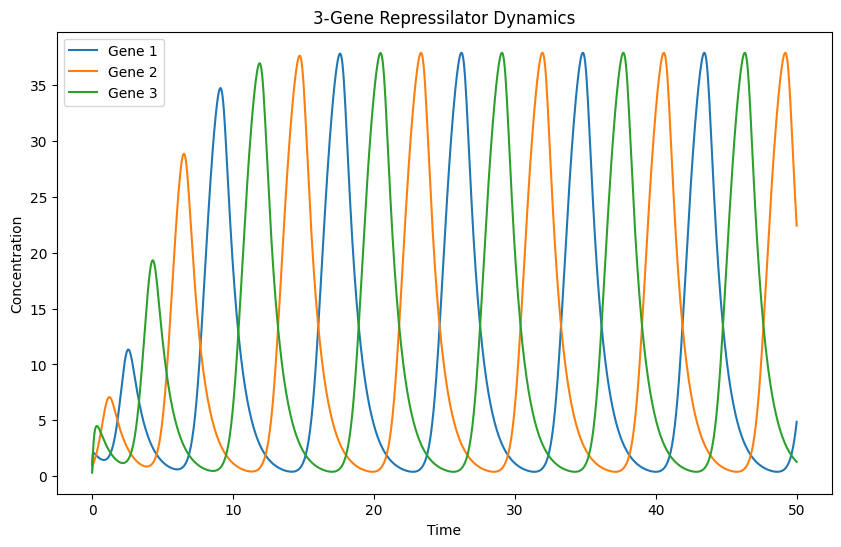

In [14]:
# Parameters
alpha = 50  # Production rate
n = 3       # Cooperativity for repression
t = np.linspace(0, 50, 1000)  # Time points

# Initial conditions with slight asymmetry
y0 = [1.0, 0.5, 0.3]

# Solve ODEs
solution = odeint(repressilator, y0, t, args=(alpha, n))
x1, x2, x3 = solution.T

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, x1, label="Gene 1")
plt.plot(t, x2, label="Gene 2")
plt.plot(t, x3, label="Gene 3")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("3-Gene Repressilator Dynamics")

This graph represents 3-gene repressilator dynamics. The concentrations of the 3 genes oscillate over time which creates a cyclic pattern. This behavior is characteristic of feedback loops in biological systems. Each gene’s peak occurs at different times. Gene 1 peaks, and then gene 2 peaks, and then gene 3 peaks. The shift in phases indicates that each gene represses the next in sequence. After the initial transient phase, the oscillations stabilize into a regular periodic pattern. This suggests that the system can maintain rhythmic behavior over time.  

Text(0.5, 1.0, '4-Gene Repressilator Dynamics')

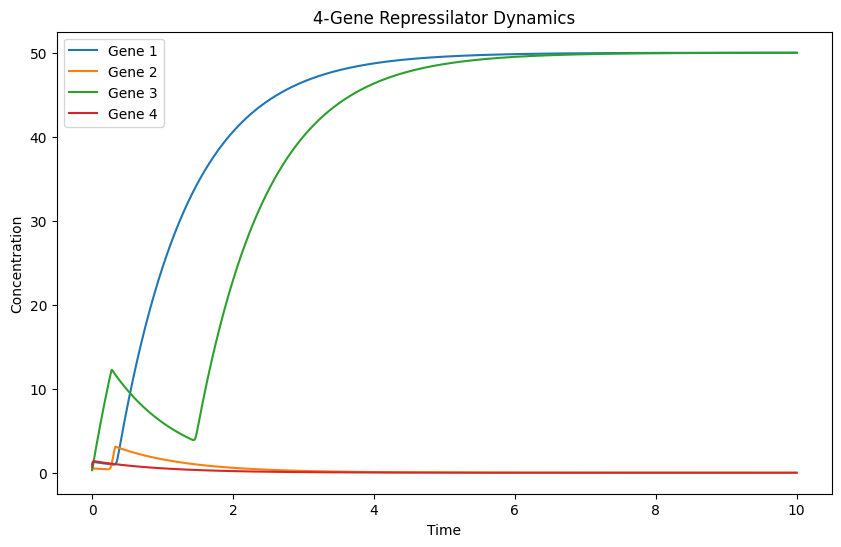

In [ ]:
# Parameters
alpha = 50  # Increased alpha to promote oscillations
n = 100     # Higher cooperativity

# New initial conditions for slight asymmetry
y0 = [1.0, 0.5, 0.3, 0.7]

# Solve ODEs
solution = odeint(repressilator, y0, t, args=(alpha, n))
x1, x2, x3, x4 = solution.T

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, x1, label="Gene 1")
plt.plot(t, x2, label="Gene 2")
plt.plot(t, x3, label="Gene 3")
plt.plot(t, x4, label="Gene 4")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("4-Gene Repressilator Dynamics")

This plot in the 4-gene repressilator system shows that the concentrations of gene 1 and gene 3 increase rapidly and dominate the system over time, stabilizing at high levels. The repression mechanisms in this system are insufficient in their ability to sustain oscillatory behavior. Gene 2 and Gene 4 concentrations are very low, which suggests that genes 1 and 3 are repressive, and causes the system to not produce oscillations. The 4-gene system, unlike the 3-gene system reaches a steady state where gene 1 and gene 3 are active and genes 2 and 4 are reppressed.  

In [11]:
# Define the system of ODEs for the 5-gene repressilator
def repressilator(y, t, alpha, beta, n):
    # y represents the concentrations of proteins for genes G1, G2, G3, G4, and G5
    G1, G2, G3, G4, G5 = y

    # Define the equations based on the repression terms
    dG1_dt = alpha / (1 + G5**n) - beta * G1
    dG2_dt = alpha / (1 + G1**n) - beta * G2
    dG3_dt = alpha / (1 + G2**n) - beta * G3
    dG4_dt = alpha / (1 + G3**n) - beta * G4
    dG5_dt = alpha / (1 + G4**n) - beta * G5

    return [dG1_dt, dG2_dt, dG3_dt, dG4_dt, dG5_dt]

Text(0.5, 1.0, '5-Gene Repressilator Dynamics')

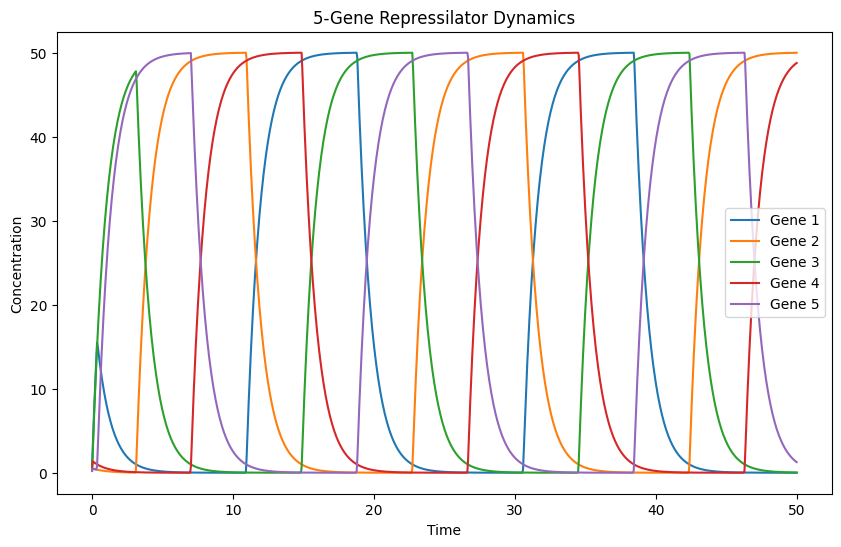

In [12]:
# Parameters
alpha = 50  # Increased alpha to promote oscillations
beta = 1    # Protein degradation rate
n = 100       # Higher cooperativity

# New initial conditions for slight asymmetry
initial_conditions = [1.0, 0.5, 0.3, 0.7, 0.2]

# Time points to solve the system over
t = np.linspace(0, 50, 1000)

# Solve the system of ODEs
solution = odeint(repressilator, initial_conditions, t, args=(alpha, beta, n))
G1, G2, G3, G4, G5 = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, G1, label="Gene 1")
plt.plot(t, G2, label="Gene 2")
plt.plot(t, G3, label="Gene 3")
plt.plot(t, G4, label="Gene 4")
plt.plot(t, G5, label="Gene 5")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("5-Gene Repressilator Dynamics")

This plot represents the 5-gene repressilator system and highlights the sustained oscillations in gene concentrations over time. Gene 1 represses Gene 2, Gene 2 represses Gene 3, and so on, until Gene 5 represses Gene 1 and completes the loop. In this system, each gene exhibits a distinct phase shift relative to the others which demonstrates the cyclical repression pattern of this system. Odd-numbered systems, such as this 5-gene configuration, promote feedback loops that sustain oscillatory behavior. Each gene represses the next in the cycle, and the odd number ensures that repression loops back with a delay, which prevents the system from settling into a steady state.  

**Overall Observations of 3, 4, and 5 gene repressilator**

The results seen in these three repressilator dynamics allow you to determine how the number of repressilator systems affects oscillatory behavior. Odd-numbered systems, such as the 3 or 5-gene configurations, promote feedback loops that sustain oscillatory behavior. Each gene represses the next in the cycle, and the odd number ensures that repression loops back with a delay, which prevents the system from settling into a steady state. Even-numbered repressilator systems, such as those with 4 genes, tend to stabilize at a fixed point rather than oscillate. This difference arises because even-numbered feedback loops lack the intrinsic delayed inhibition necessary for oscillations. Instead, repression balances out, resulting in a stable steady state.  

The results observed in these simulations are consistent with the theoretical dynamics mentioned above. The 3 gene and 5 gene repressilators demonstrate stable and sustained oscillations, validating our expectations of the feedback loop. This allows odd-numbered repressilators to be very useful for modeling biological clocks or rhythmic gene expression in synthetic biology/simulations.   

# **How do changes in production rate (α), degradation rate (β), stochasticity, and initial conditions affect the frequency, stability, and behavior of the repressilator system?**

In [4]:
def gillespie_repressilator(alpha, n, max_time):
    def propensity(state):
        x1, x2, x3, x4 = state
        return np.array([
            alpha / (1 + x4**n),  # Production of x1
            alpha / (1 + x1**n),  # Production of x2
            alpha / (1 + x2**n),  # Production of x3
            alpha / (1 + x3**n),  # Production of x4
            x1,                   # Degradation of x1
            x2,                   # Degradation of x2
            x3,                   # Degradation of x3
            x4                    # Degradation of x4
        ])

    # Define state updates for each reaction
    reactions = np.array([
        [1, 0, 0, 0],  # x1 production
        [0, 1, 0, 0],  # x2 production
        [0, 0, 1, 0],  # x3 production
        [0, 0, 0, 1],  # x4 production
        [-1, 0, 0, 0], # x1 degradation
        [0, -1, 0, 0], # x2 degradation
        [0, 0, -1, 0], # x3 degradation
        [0, 0, 0, -1]  # x4 degradation
    ])

    # Initialize state and time
    state = np.array([10, 10, 10, 10])  # Initial molecule counts
    time = 0
    times = [time]
    states = [state.copy()]

    while time < max_time:
        a = propensity(state)
        a0 = a.sum()
        if a0 == 0:
            break

        # Time to next reaction
        tau = np.random.exponential(1 / a0)

        # Determine which reaction occurs
        r = np.random.uniform(0, a0)
        reaction_index = np.searchsorted(np.cumsum(a), r)

        # Update state and time
        state += reactions[reaction_index]
        time += tau

        times.append(time)
        states.append(state.copy())

    return np.array(times), np.array(states)

Text(0.5, 1.0, 'Gillespie Simulation of 4-Gene Repressilator')

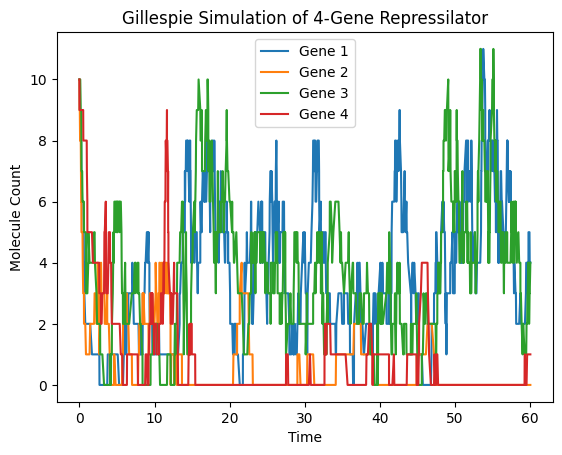

In [5]:
# Parameters
alpha = 5
n = 3
max_time = 60

# Run simulation
times, states = gillespie_repressilator(alpha, n, max_time)

# Plot results
plt.plot(times, states[:, 0], label="Gene 1")
plt.plot(times, states[:, 1], label="Gene 2")
plt.plot(times, states[:, 2], label="Gene 3")
plt.plot(times, states[:, 3], label="Gene 4")
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.legend()
plt.title("Gillespie Simulation of 4-Gene Repressilator")

This is the general graph representing a Gillespie simulation of a 4-gene repressilator, which is shown in prioir graphs without the stochastic behavior. The stochasticity of gene expression leads to irregular oscillations in molecule counts. Gene 1 and Gene 3 show clear bursts of activity, where it alternates in dominance. These genes are activated when their repressors (Gene 2 and Gene 4) are temporarily inactive or have lower molecule counts due to stochastic fluctuations. In contrast, the other two genes (Gene 2 and Gene 4) stabilize around a molecule count of 0 for most of the simulation. This is because they are repressed by their upstream regulators, which aligns with the prioir simulation graphs without the stochasticity factor.

In [6]:
# Gillespie simulation for the repressilator
def gillespie_repressilator(alpha, beta, n, T, initial_conditions):
    # Initialize variables
    time = [0]
    x = [initial_conditions]

    # Reaction functions
    def propensity(x, alpha, beta, n):
        x1, x2, x3 = x
        return [
            alpha / (1 + x3**n),  # Production of x1
            beta * x1,           # Degradation of x1
            alpha / (1 + x1**n), # Production of x2
            beta * x2,           # Degradation of x2
            alpha / (1 + x2**n), # Production of x3
            beta * x3            # Degradation of x3
        ]

    # Simulation loop
    while time[-1] < T:
        # Calculate propensities
        a = propensity(x[-1], alpha, beta, n)
        a0 = sum(a)

        if a0 == 0:
            break

        # Determine time to next reaction
        tau = np.random.exponential(1 / a0)

        # Determine which reaction occurs
        r = np.random.uniform(0, a0)
        cumulative_sum = np.cumsum(a)
        reaction = np.searchsorted(cumulative_sum, r)

        # Update molecule counts based on reaction
        x1, x2, x3 = x[-1]
        if reaction == 0:
            x1 += 1  # Production of x1
        elif reaction == 1:
            x1 -= 1  # Degradation of x1
        elif reaction == 2:
            x2 += 1  # Production of x2
        elif reaction == 3:
            x2 -= 1  # Degradation of x2
        elif reaction == 4:
            x3 += 1  # Production of x3
        elif reaction == 5:
            x3 -= 1  # Degradation of x3

        # Update time and state
        time.append(time[-1] + tau)
        x.append([max(0, x1), max(0, x2), max(0, x3)])  # Ensure non-negative molecule counts

    return np.array(time), np.array(x)

Text(0.5, 1.02, 'Gillespie Simulation of Repressilator with Varying α and β')

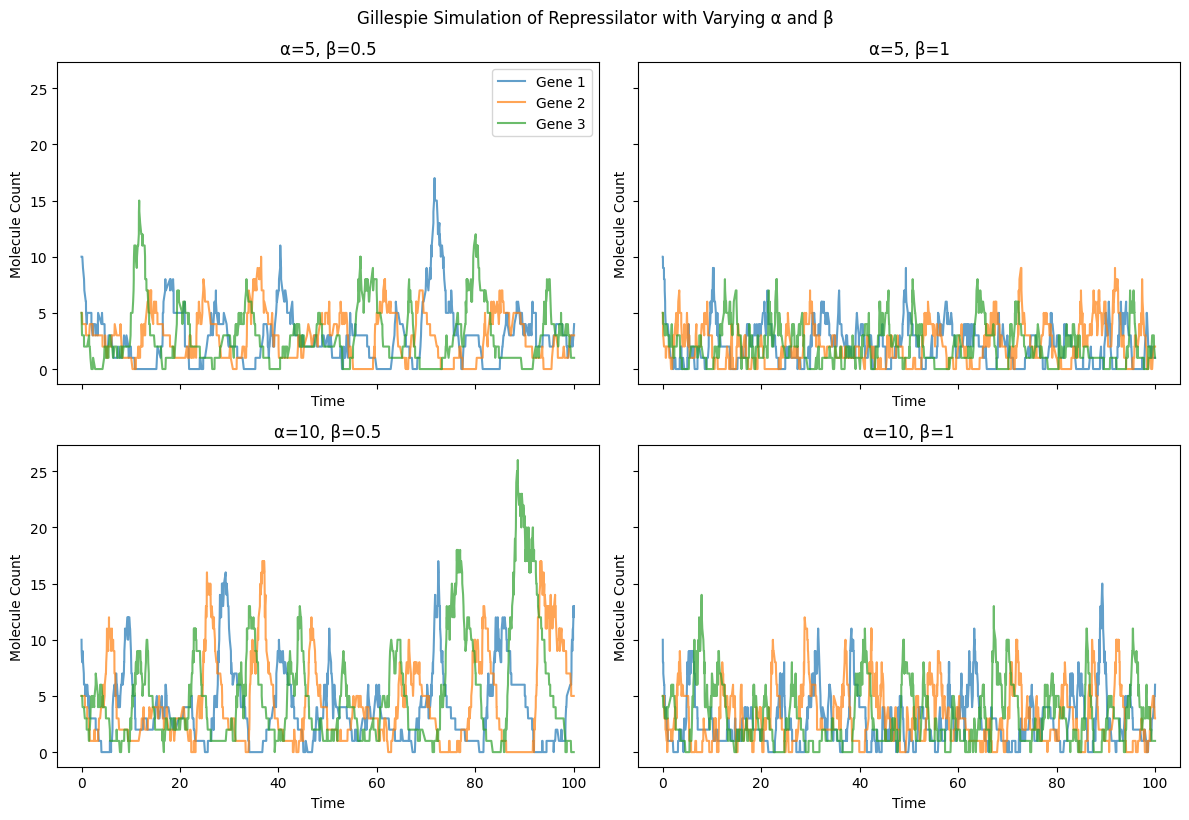

In [7]:
# Parameters
alpha_values = [5, 10]  # Varying production rates
beta_values = [0.5, 1]  # Varying degradation rates
n = 2                   # Cooperativity
T = 100                 # Total simulation time
initial_conditions = [10, 5, 5]  # Initial molecule counts for genes

# Plot results for different alpha and beta
fig, axes = plt.subplots(len(alpha_values), len(beta_values), figsize=(12, 8), sharex=True, sharey=True)

for i, alpha in enumerate(alpha_values):
    for j, beta in enumerate(beta_values):
        time, x = gillespie_repressilator(alpha, beta, n, T, initial_conditions)
        ax = axes[i, j]
        ax.plot(time, x[:, 0], label="Gene 1", alpha=0.7)
        ax.plot(time, x[:, 1], label="Gene 2", alpha=0.7)
        ax.plot(time, x[:, 2], label="Gene 3", alpha=0.7)
        ax.set_title(f"α={alpha}, β={beta}")
        ax.set_xlabel("Time")
        ax.set_ylabel("Molecule Count")
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.suptitle("Gillespie Simulation of Repressilator with Varying α and β", y=1.02)

The Gillespie Simulation shows that the dynamics of the repressilator system are highly sensitive to the production rate (α) and degradation rate (β). Increasing α amplifies oscillation amplitude and frequency by increasing gene expression levels. Decreasing α reduces production, often leading to weaker or dampened oscillations. Moreover, increasing β shortens oscillation cycles and stabilizes frequency by allowing for rapid decay, while decreasing β slows degradation, causing gene concentrations to remain at a higher value longer and potentially destabilizing the system. Achieving a balance between α and β is necesary for producing stable and biologically realistic oscillations, especially in stochastic simulations like the Gillespie algorithm.

The system's behavior also depends on whether oscillations or steady states dominate. When the feedback loop is strong and parameters are well-balanced, oscillations in gene concentrations are more likely. However, parameters that favor rapid degradation or insufficient production can cause the system to quickly settle into a steady state with very few fluctuations. The stochastic nature of the simulation influences consistency in their oscillations. Larger systems with higher concentrations usually exhibit more consistent oscillations.

Initial conditions also play a vital role in determining the system's long-term dynamics. Asymmetric initial conditions (as seen in the graphs above) causes phase-shifted oscillations, while extreme starting values (very high or very low concentrations) can extend stabilization time or even suppress oscillations in smaller systems. However, over time with asymmetric initial conditions, the characteristic oscillatory pattern remains (as seen in the above graphs with an odd number gene repressilator).

# **How do the interactions between KaiA, KaiB, and KaiC proteins drive the oscillatory behavior of the circadian rhythm in cyanobacteria based on the graph?**

In [8]:
# Define the ODE system for the cyanobacterial circadian clock
def cyanobacterial_clock(y, t, alpha, beta, gamma, delta, epsilon, zeta, eta):
    KaiA, KaiB, KaiC = y
    dKaiA_dt = alpha - beta * KaiA - gamma * KaiB
    dKaiB_dt = delta * KaiC - epsilon * KaiB
    dKaiC_dt = zeta * KaiA - eta * KaiC
    return [dKaiA_dt, dKaiB_dt, dKaiC_dt]

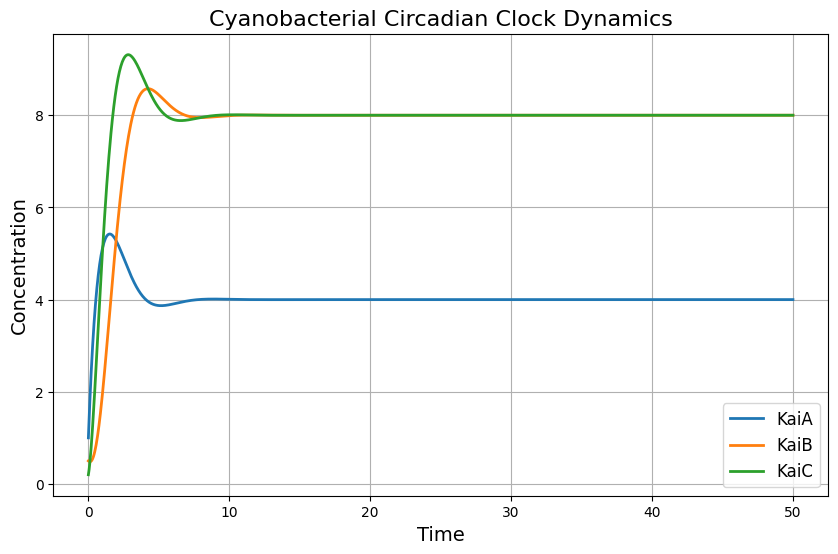

In [9]:
# Initial concentrations of KaiA, KaiB, KaiC
y0 = [1.0, 0.5, 0.2]  # Adjusted to reflect plausible initial conditions

# Time points for simulation
t = np.linspace(0, 50, 1000)  # 50 units of time with 1000 points

# Parameters for the system
alpha = 10    # Production rate of KaiA
beta = 1.5    # Degradation rate of KaiA
gamma = 0.5   # Repression of KaiA by KaiB
delta = 1.0   # Activation of KaiB by KaiC
epsilon = 1.0 # Degradation rate of KaiB
zeta = 2.0    # Activation of KaiC by KaiA
eta = 1.0     # Degradation rate of KaiC

# Solve the ODE system
solution = odeint(cyanobacterial_clock, y0, t, args=(alpha, beta, gamma, delta, epsilon, zeta, eta))

# Extract solutions for KaiA, KaiB, KaiC
KaiA, KaiB, KaiC = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, KaiA, label='KaiA', linewidth=2)
plt.plot(t, KaiB, label='KaiB', linewidth=2)
plt.plot(t, KaiC, label='KaiC', linewidth=2)
plt.title('Cyanobacterial Circadian Clock Dynamics', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Concentration', fontsize=14)
plt.legend(fontsize=12)
plt.grid()

During the initial phase of the graph, KaiA, KaiB, and KaiC concentrations increase sharply. This makes sense as this is likely the initial phosphorylation phase where KaiA promotes KaiC's activity to drive oscillations.

We see that KaiC reaches its peak concentration first, and KaiB reaches it's peak shortly after. This indicates that KaiB binds to the phosphorylated structure of KaiC during this phase. The closeness of their peaks highlights their interaction, where KaiB inhibits KaiA’s influence on KaiC.

Over time, all three proteins stabilize, with KaiC remaining at the highest concentration, KaiB slightly below, and KaiA at the lowest. This stabilization suggests that the circadian system reaches a steady state where oscillations stop. This may be because the graph focuses on a single cycle rather than maintained rhythms.

Furthermore, the initial overshoot and dampening of oscillations seen in KaiA and KaiB likely reflect feedback mechanisms. As established above, KaiA drives KaiC phosphorylation, and KaiB moderates KaiA's activity to eventually stabilize the system.

Overall, the feedback loops lead to initial oscillations that gradually stabilize under controlled conditions. This reflects how these proteins synchronize cyanobacterial rhythms.

[To learn more about the Cyanobacteria Circadian Clock, feel free to read through this article linked here!](https://pmc.ncbi.nlm.nih.gov/articles/PMC2585598/)

# **Future Work and Next Steps**

Here are some of the next steps that can be taken to better develop our project with more in-depth analysis methods, if we had more time to work on this project:



*   We could expand the repressilator by adding additional feedback loops or cross-coupled oscillators. This could include coupling with other oscillatory systems to obseve and understand its synchronization or stabilization properties.
*   We could use RNA sequencing datasets to validate our models. Although we showed a biological system of circadian rythms of cyanobacteria, it would be interesting to use a real dataset and focus on identifying genes or pathways that show oscillatory behavior

*   We could connect our genetic circuit models to a population to show how single-cell oscillations compare it against population-level behaviors.

*   It would be interesting to see how mutations in KaiA, KaiB, or KaiC and model how these changes affect their oscillation. For example, there may be interesting rythms and changes in the graph if a mutation in KaiA affected its ability to bind KaiC.

*   We could also study how external factors like light intensity, temperature, or nutrient availability affect the dynamics of Kai protein oscillations. We could simulate certian conditions to investigate how they influence circadian rhythms.


*   Similar to our other models in this portfolio, we could examine how changes in parameters of the Kai Proteins would affect each other. We could use this data to identify which factors have the greatest influence on the amplitude and period of oscillations. This could include rates of phosphorylation, dephosphorylation, and binding affinities.
*   Again, similar to our other models in this portfolio, we could introduce stochasticity into the Kai model to reflect the natural variability in protein expression or interactions. This would help study how the circadian clock works under noise/choatic conditions.